# Sentiment Analysis of Media

1. CNN had the most negative sentiment at the time of the analysis, followed by Fox News.
2. CBC had the most positive sentiment at the time of the analysis.
3. The New York Times was the closest one to the neutral score of 0.  

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tweepy
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [13]:
# Twitter API Keys
consumer_key = "7xy8Y9idclPxi4SluDxxuRVoQ"
consumer_secret = "L6Mw9c27q8nUIW0c5sF8o0qAV7QCsv8tqEpYR5bKtqcE3W6rqQ"
access_token = "906340601829851136-upXhJ8ahxI95FYlAQHWivFFO4515Y8a"
access_token_secret = "iSa1fb0Ff4unJ0zPzabUlUBIL29Y3zyEhmLocMBEraA7K"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [14]:
target_users = ["BBC","CBC","CNN","FoxNews","nytimes"]

In [15]:
# List for holding sentiments
sentiments =[]

In [16]:
# Loop through target users
for user in target_users:
    tweet_number = 0
    public_tweets = api.user_timeline(user, count = 100)
    
    
    for tweet in public_tweets:
        
        #Run the Vader analysis on each tweet.
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_ago = tweet_number
        timestamp = tweet['created_at']
        converted_timestamp = datetime.strptime(timestamp, '%a %b %d %H:%M:%S %z %Y').date()
        
        #Create a dictionary of sentiments
        sentiments.append({"News Source" : user,
                           "Date": converted_timestamp,
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets ago": tweet_number,
                           "Tweet Text": tweet_text})
        tweet_number+=1

 

In [17]:
#create a data frame
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets ago
0,-0.6486,2018-03-22,0.202,0.798,BBC,0.000,"In 1918, the very first signs of the Spanish F...",0
1,0.0000,2018-03-22,0.000,1.000,BBC,0.000,Go behind-the-scenes at @TheBigCatSanct where ...,1
2,0.0516,2018-03-22,0.159,0.625,BBC,0.216,Tai chi has been recommended to help people wi...,2
3,-0.2500,2018-03-22,0.083,0.917,BBC,0.000,"The cost of living alone, rather than living a...",3
4,0.0000,2018-03-22,0.000,1.000,BBC,0.000,.@ManUtd have applied to have a professional w...,4


In [18]:
BBC_df = news_sentiments.loc[news_sentiments["News Source"] == "BBC",:]
CBC_df = news_sentiments.loc[news_sentiments["News Source"] == "CBC",:]
FoxNews_df = news_sentiments.loc[news_sentiments["News Source"] == "FoxNews",:]
CNN_df = news_sentiments.loc[news_sentiments["News Source"] == "CNN",:]
Nytimes_df = news_sentiments.loc[news_sentiments["News Source"]=="nytimes",:]

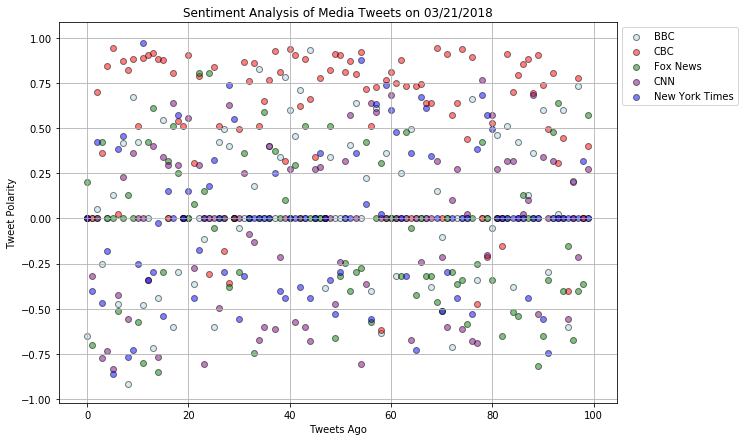

In [19]:
#Adding size
plt.figure(figsize=(10, 7))

#Scatter plots
BBC_plot = plt.scatter(x=BBC_df['Tweets ago'], y=BBC_df['Compound'],marker="o",c='lightblue', edgecolors="black",alpha=0.5, label= "BBC")
CBC_plot = plt.scatter(x= CBC_df['Tweets ago'], y= CBC_df['Compound'], marker = "o", c = 'red', edgecolors='black',alpha=0.5, label = "CBC")
Fox_plot = plt.scatter(x= FoxNews_df['Tweets ago'], y= FoxNews_df['Compound'], marker = "o", c = 'green', edgecolors='black',alpha=0.5, label = "Fox News")
CNN_plot = plt.scatter(x= CNN_df['Tweets ago'], y= CNN_df['Compound'], marker = "o", c = 'purple', edgecolors='black',alpha=0.5, label = "CNN")
Nytimes_plot = plt.scatter(x= Nytimes_df['Tweets ago'], y= Nytimes_df['Compound'], marker = "o", c = 'blue', edgecolors='black',alpha=0.5, label = "New York Times")




#Add legend
plt.legend(bbox_to_anchor = (1,1))


#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets on 03/21/2018")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()



plt.savefig("Sentiment_analysis.png")
plt.show()

In [20]:
#export Data Frame into csv
news_sentiments.to_csv("News_Sentiments.csv")

In [21]:
# get the overall sentiment per media and store it in a dataframe
sentiment_overall = news_sentiments.groupby('News Source').agg({'Compound': np.mean}).reset_index() 
sentiment_overall

,News Source,Compound
0,BBC,0.064125
1,CBC,0.552211
2,CNN,-0.043322
3,FoxNews,-0.071757
4,nytimes,-0.008516


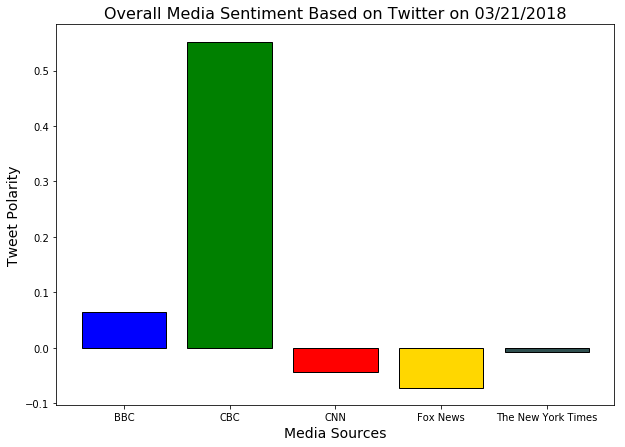

In [22]:
#set the axis
x_axis = np.arange(len (sentiment_overall['News Source']))
avg_compound = sentiment_overall['Compound']

#set figure size
plt.figure(figsize=(10,7))

#set colors
colors = {"BBC": "blue", "CBC": "green", "CNN": "red", 
          "FoxNews": "gold", "nytimes": "darkslategray"}

#plot bar
# Plot bars
sentiment_bar= plt.bar(x_axis, avg_compound, color = sentiment_overall['News Source'].map(colors), 
                  edgecolor='black', alpha=1, align="edge")

# Place tick locations and label
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBC", "CNN", "Fox News", "The New York Times"])

# Labels
plt.title('Overall Media Sentiment Based on Twitter on 03/21/2018', fontsize=16)
plt.xlabel('Media Sources', fontsize=14)
plt.ylabel('Tweet Polarity', fontsize=14)

# Save and show
plt.savefig('media_overall.png')
plt.show()
